In [1]:
import pandas as pd
import glob
import subprocess
from collections import defaultdict
import pathlib
import subprocess
import matplotlib.pyplot as plt

In [2]:
_type= 'Hypo'
_dir = '500_result'

In [3]:
use_bed_path = f'{_dir}/{_type}.hotspot.bed'

In [4]:
command = f"annotatePeaks.pl {use_bed_path} mm10 > {_type}.Homer.annotated.txt"

In [5]:
command

'annotatePeaks.pl 500_result/Hypo.hotspot.bed mm10 > Hypo.Homer.annotated.txt'

In [6]:
#subprocess.run(command , shell = True)

## plot

In [9]:
def get_data(_type):
    tmpdf = pd.read_csv(f'{_dir}/{_type}.Homer.annotated.txt',
                    sep='\t', header=0, index_col=False)
    annot = tmpdf['Annotation'].tolist()

    all_locations  = []
    for _ in annot:
        location = _.split('(')[0]
        all_locations.append(location)
    data = pd.Series(all_locations).value_counts()
    return data

In [10]:
data_hypo = get_data('Hypo')
data_hyper = get_data('Hyper')

In [11]:
color_dict = {
    'intron ': '#1f77b4',  # blue
    'Intergenic': '#ff7f0e',  # orange
    'exon ': '#2ca02c',  # green
    "3' UTR ": '#d62728',  # red
    'promoter-TSS ': '#9467bd',  # purple
    'TTS ': '#8c564b',  # brown
    'non-coding ': '#e377c2',  # pink
    "5' UTR ": '#7f7f7f'  # grey
}

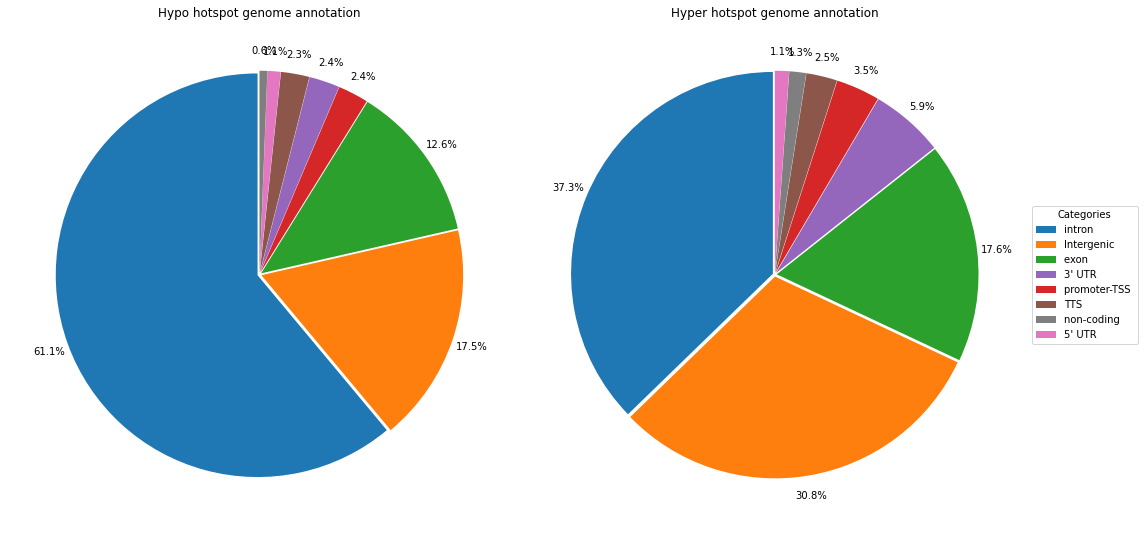

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype']=42


# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# First Pie Chart
axes[0].pie(data_hypo, autopct='%.1f%%', startangle=90, labels=None, 
            colors = [color_dict[label] for label in data_hypo.index],
            pctdistance=1.1,  
            explode=[0.01] * len(data_hypo))
axes[0].set_title(f'Hypo hotspot genome annotation')
axes[0].set_ylabel('')  # Hide the y-axis label on the first pie chart

# Second Pie Chart
axes[1].pie(data_hyper, autopct='%.1f%%', startangle=90, labels=None,
           colors = [color_dict[label] for label in data_hyper.index],
           pctdistance=1.1,  
           explode=[0.01] * len(data_hyper))
axes[1].set_title(f'Hyper hotspot genome annotation')
axes[1].set_ylabel('')  # Hide the y-axis label on the second pie chart

plt.legend(title='Categories', loc='center left', bbox_to_anchor=(1, 0.5), labels=data_hypo.index)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig(f'figure/hotspot_genome_annotation.pdf', dpi=300)
plt.show()


